In [18]:
import csv
import datetime
import time
import os
from selenium import webdriver

import matplotlib.pyplot as plt
import collections
from openpyxl import load_workbook

import math
import statistics
import numpy as np
import pandas as pd

import openpyxl
openpyxl.Workbook.encoding = "cp936"


In [23]:
def get_filename_from_folder(folder_path, ext=""):
    file_name_list = []
    for file_name in os.listdir(folder_path):
        name = os.path.join(folder_path + "/"+ file_name)
        
        # get file extension
        file_ext = os.path.splitext(file_name)[1]
        # if user give ext and the file extension is not the same, pass
        if ext and file_ext != ext:
            continue
        
        # os.rename(name, os.path.join(folder_path + "/"+ file_name[1:]))
#         
        file_name_list.append(name)
        
    return sorted(file_name_list)

def filename_process(target, filename_list):
    
    split_file_name = [ x.split("_") for x in filename_list]
    
    for i in split_file_name:
        try:
            ytr = i[1][1:]
            types = i[3]
            start = i[4]
            end = i[5].split(".")[0]
        
            if target == ytr:
                yield ytr, types, start, end
        except:
            pass

def get_file_by_ytr_and_date(ytr, types, start, filename_list):
    file_list = []
    for fytr, ftypes, fstart, fend in filename_process(ytr, filename_list):
        if fytr == ytr and ftypes == types and fstart == start:
            name = f"./yt_/{fytr}_單主題_{ftypes}_{fstart}_{fend}.xlsx"
            file_list.append(name)
    return file_list


def string_to_datetime(s):
    return datetime.datetime.strptime(s, '%Y/%m/%d')


In [3]:
filename_list_op = get_filename_from_folder("./yt_")
ytr_list = list(set())
filename_list_op[0]

'./yt_/Dr.Ivan_單主題_來源_20191201_20201231.xlsx'

In [4]:
for filename in get_file_by_ytr_and_date("HowFun", '趨勢', "20201201", filename_list_op):
    print(filename)


./yt_/HowFun_單主題_趨勢_20201201_20211222.xlsx


## opview plot

In [146]:

# opview 資料（聲量）

def get_ytrs_view_and_emotion_by_startdate(ytrs: list, startdate: str, enddate: str):
    DATE = "20201201"
    ytrs_view = []
    ytrs_emotion = []
    for ytr in ytrs:
        for filename in get_file_by_ytr_and_date(ytr, '趨勢', DATE, filename_list_op):
            wb = load_workbook(filename=filename)
            op_view_data = collections.OrderedDict()
            # op_view_data['name'] = ytr
            opview_wb = wb['日趨勢']
            for i in range(2, opview_wb.max_row+1):
                day = opview_wb.cell(column=1, row=i).value
                qty = opview_wb.cell(column=2, row=i).value
                
                if day >= startdate and day <= enddate:
                    op_view_data[day] = qty

            ytrs_view.append(op_view_data)
        
        for filename in get_file_by_ytr_and_date(ytr, '情緒', DATE, filename_list_op):
            # opview 資料（情緒）
            wb = load_workbook(filename=filename)
            op_view_emotion = collections.OrderedDict(
                {'good': collections.OrderedDict(), 'bad': collections.OrderedDict()})
            # op_view_emotion['name'] = ytr
            opview_wb = wb['日情緒趨勢']
            for i in range(2, opview_wb.max_row+1):

                day = opview_wb.cell(column=1, row=i).value
                good = opview_wb.cell(column=2, row=i).value
                bad = opview_wb.cell(column=3, row=i).value
                total = opview_wb.cell(column=4, row=i).value
                if day >= startdate and day <= enddate:
                    op_view_emotion["good"][day] = good
                    op_view_emotion["bad"][day] = bad

            ytrs_emotion.append(op_view_emotion)
    return ytrs_view ,ytrs_emotion


In [178]:
ytrs = ["Joeman", "Toyz", "NanaQ", "呱吉"]
STARTDATE = "2021/09/01"
# STARTDATE = "20200201"
ENDDATE = "2021/12/31"
ytrs_view, ytrs_emotion = get_ytrs_view_and_emotion_by_startdate(ytrs, STARTDATE, ENDDATE)


Joeman


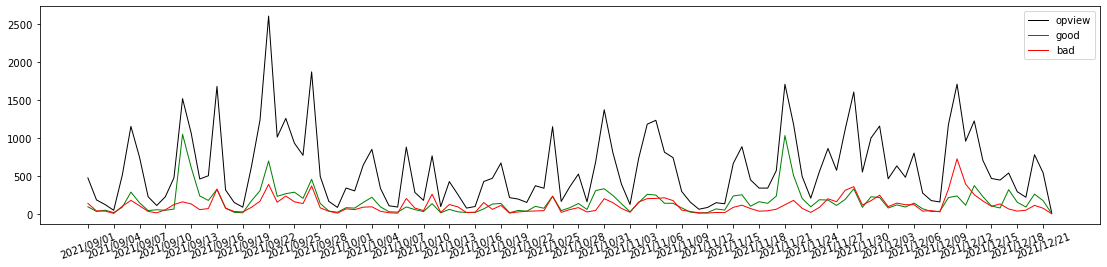

Toyz


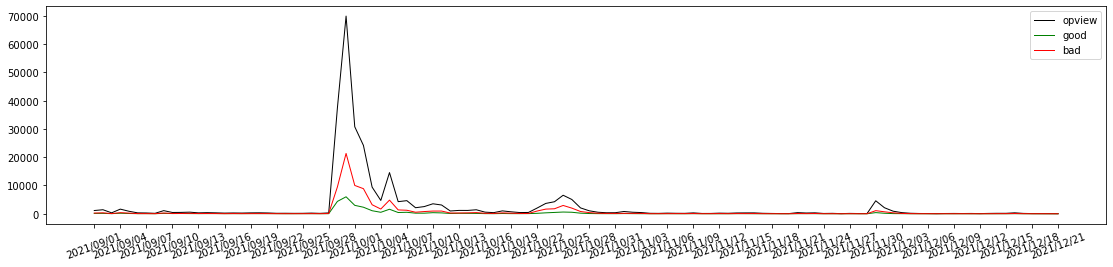

NanaQ


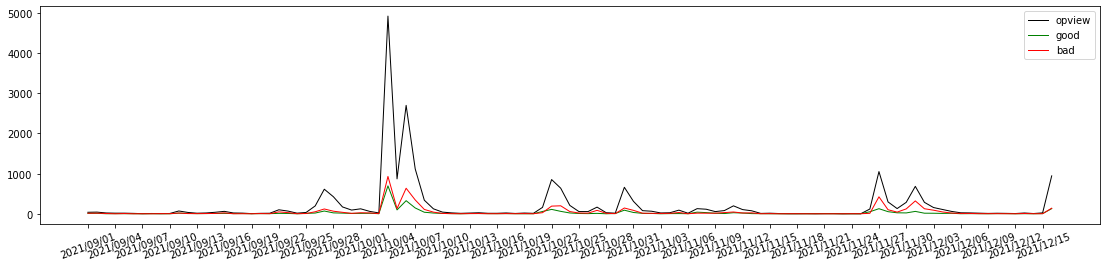

呱吉


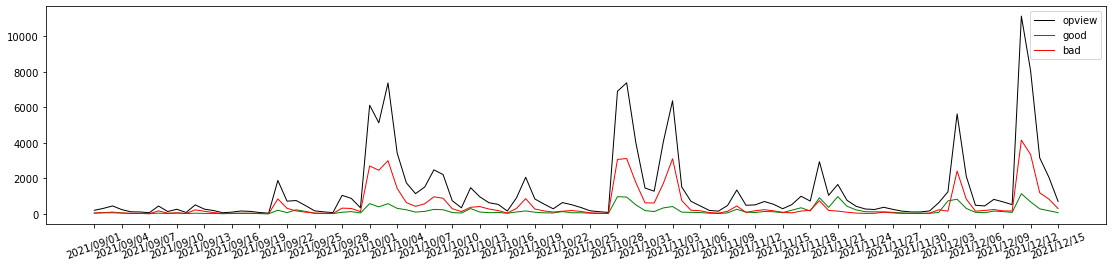

In [179]:
# plot views and good/bad emotions
STEPSIZE = 3
for view, emotion, name in zip(ytrs_view, ytrs_emotion, ytrs):
    print(name)
    fig, ax1 = plt.subplots(figsize=(19,4))
    ax1.plot(view.values(),figure=fig, linewidth=1, c='black', label="opview")
    ax1.plot(emotion["good"].values(), figure=fig, linewidth=1, c='g', label="good")
    ax1.plot(emotion["bad"].values(), figure=fig, linewidth=1, c='r', label="bad")
    plt.xticks(range(0, len(list(view.values())), STEPSIZE),
               list(view.keys())[::STEPSIZE], rotation=20)
    ax1.legend()
    plt.show()


## read news

In [180]:
filename_list_news_et = []
for ytr in ytrs:
    print(ytr)
    ytr_news = [] # news list for each ytr
    filename_list_news = get_filename_from_folder(
        "/Users/bobo/OneDrive - 台灣微軟/0. bobo/Codes/crawlers/data/" + ytr)
    for x in filename_list_news:
        # , "apple_news.csv", "dcard.csv" "ettoday_tag.csv", "ptt.csv"
        if x.split('/')[-1] in ["ettoday_keywords.csv"]:
            ytr_news.append(x)
    filename_list_news_et.append(ytr_news)
filename_list_news_et


Joeman
Toyz
NanaQ
呱吉


[['/Users/bobo/OneDrive - 台灣微軟/0. bobo/Codes/crawlers/data/Joeman/ettoday_keywords.csv'],
 ['/Users/bobo/OneDrive - 台灣微軟/0. bobo/Codes/crawlers/data/Toyz/ettoday_keywords.csv'],
 ['/Users/bobo/OneDrive - 台灣微軟/0. bobo/Codes/crawlers/data/NanaQ/ettoday_keywords.csv'],
 ['/Users/bobo/OneDrive - 台灣微軟/0. bobo/Codes/crawlers/data/呱吉/ettoday_keywords.csv']]

In [181]:
news_list = []
for filename_list in filename_list_news_et: # iterate ytr
    news = []
    for filename in filename_list: 
        with open(filename, encoding="utf-8") as f:
            reader = csv.reader(f)
            for row in reader:
                # Source,Title,Link,Date,Summary,Text,Like

                if row == ['Source', 'Title', 'Link', 'Date', 'Summary', 'Text', 'Like']:
                    continue
                Source = row[0]
                Title = "".join(row[1].split())
                Link = row[2]
                Date = row[3].split(" ")[0].replace('-', '/')
                Summary = "".join(row[4].split())
                Text = row[5]

                news.append({"source" : Source , "title": Title, "link": Link,
                                "date": Date, "summary": Summary, "text": Text})
    news_list.append(news)


In [182]:
df = pd.DataFrame(news_list[0])
df["date"].isnull().sum()

0

In [184]:
MULTIPLY = 5
print('單日大於', MULTIPLY, '倍過去七天的平均：')

# event definition
for view, emotion, name, news in zip(ytrs_view, ytrs_emotion, ytrs, news_list):
    if name != "呱吉":
        continue
    print(name)
    # event definition
    data = [list(view.values())[0]] * 7
    data.extend(list(view.values()))

    count = 0
    event_list = []

    for i, d in enumerate(data[7:], start=7):
        seven_day = data[i-7:i]
        seven_day_avg = sum(seven_day)/7
        if d > MULTIPLY * seven_day_avg:
            day = list(view.keys())[i-7]
            event_list.append(day)
    print(event_list)

    # find news
    print('來源     事件日期      日期好壞比  新聞日期     新聞日期好壞比    新聞標題')
    for i in news:
        day_add = datetime.timedelta(days=0)
        try:
            news_date = string_to_datetime(i['date'])
        except:
            news_date = i['date'].split(" ")[0].replace("-", "/")
            news_date = string_to_datetime(news_date)
            print(news_date)
        for event in event_list:
            event_day = string_to_datetime(event)
            if news_date >= event_day and news_date <= event_day + day_add:
                print(i['source'], event_day.strftime('%Y-%m-%d'), ' ',
                    '%.2f' % (round(
                        emotion['good'][event] / emotion['bad'][event], 2)), '    ',
                    news_date.strftime('%Y-%m-%d'), '  '
                    '%.2f' % (round(
                        emotion['good'][i['date']] / emotion['bad'][i['date']], 2)), '       ',
                    i['title'])


單日大於 5 倍過去七天的平均：
呱吉
['2021/09/21', '2021/10/01', '2021/10/28', '2021/10/29', '2021/12/04', '2021/12/11']
來源     事件日期      日期好壞比  新聞日期     新聞日期好壞比    新聞標題
ettoday 2021-12-11   0.27      2021-12-11   0.27         反方「呱吉」邱威傑嗆：核四重啟再拖15年「顏寬恒能當阿祖了」
ettoday 2021-12-11   0.27      2021-12-11   0.27         LIVE／最終場公投意見說明會呱吉VS黃士修戰重啟核四
ettoday 2021-12-04   0.34      2021-12-04   0.34         公投倒數14天！雞排妹表態將投「4個不同意」
ettoday 2021-12-04   0.34      2021-12-04   0.34         民進黨社群之夜有嘻哈饒舌歌手DISS狠嗆：婆婆逼媳婦喝豬肝湯
ettoday 2021-12-04   0.34      2021-12-04   0.34         LIVE／蔡英文今晚登社群之夜林昶佐、饒舌歌手同台挺四個不同意
ettoday 2021-12-04   0.34      2021-12-04   0.34         蔡英文今晚登社群之夜「辣台派開講」饒舌歌「四個不同意」曝光
ettoday 2021-12-04   0.34      2021-12-04   0.34         中油「郭雪芙」：接地氣也要接天然氣王美花宣講三接出新招
ettoday 2021-10-28   0.32      2021-10-28   0.32         柯文哲突襲議員辦公室呱吉動怒捶桌：企圖製造「不願見面假象」
ettoday 2021-10-01   0.21      2021-10-01   0.21         呱吉道歉龍龍了！「挖出1年前PO文」點名老K霸凌：應該道歉
ettoday 2021-10-01   0.21      2021-10-01   0.21         龍龍暴怒開戰呱吉：噁不噁心